# <center>Sampling and Inference</center>

In this notebook, we will explain statistical inference, which is a core part of statistics. In financial analysis, we're concerned about characteristics of some targets called a population.

For example, we want to make use of historical data of a couple years, called sample, to estimate the real mean return of some private equity funds. Sometimes, we also want to testify some claims. For example, if the fund managers claim that their investment strategy can generate 30% yearly return, we have to validate this claim using data of the last 20 years.

These two applications are typical tasks of statistical inference to infer the promptings of interesting targets. First, we will talk about population, samples and random sampling. Next, we will find out the distribution of sample mean. Furthermore, we will learn how to use confidence interval to estimate population mean, for example, the average data return. Finally, hypothesis testing, will be introduced and applied in validating some claims about the mean return.

## <center>Import Libraries</center>

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

## <center>Population and Sample</center>

First, we are going to discuss basic concepts about population and sample. 

*Population* is a group of individuals who have something in common. We may be interested in some properties about a certain group, which we call target *population*, that cannot be observed completely. For example, all registered voters in Thailand, or all Hong Kong citizens who played golf at least once past year, or all neurons from your brain. Since we cannot get information for every individual of these populations, we have to take *sample*, which is a part of target population. *Sample* is a small group of population. It is a representative of the population, hence, it has to be **randomly selected**. This process is called *random sampling*. 

There are two kinds of sampling, called a sampling without replacement, or with replacement, depending on whether you put the select individuals back into population before you select the next one.

In a sampling without replacement, an individual is randomly selected from the population. The next individual will be selected without putting the previous individual back. Every individual is selected from a different pool. If the population size is very large, this method is a factor because it can generate a random sample with different individuals.

There is another kind of sampling method, sampling with replacement.A randomly selected individual will be put back before the next individual being selected. Hence, it is possible that the same individual can be selected more than once. When the population is small, this method can make sure that everyone in the population has the same chance being selected.

In this example, we first create a blank DataFrame and we create a new column in this DataFrame, named as *Population*. 

In [2]:
# Create a Population DataFrame with 10 data 

data = pd.DataFrame()
data['Population'] = [47, 48, 85, 20, 19, 13, 72, 16, 50, 60]

By running the next cell we will perform sampling from the population by drawing five individuals randomly without replacement. And stored them, as *a_sample_without_replacement*. In pandas we can use method sample to get samples. Here, the keyword replace=False means the sampling is a sampling without replacement.

In [3]:
# Draw sample without replacement, size=5 from Population

a_sample_without_replacement = data['Population'].sample(5, replace=False)
print(a_sample_without_replacement)

6    72
9    60
1    48
7    16
4    19
Name: Population, dtype: int64


We can define replace=True to perform sampling with replacement.

In [4]:
# Draw sample with replacement, size=5 from Population

a_sample_with_replacement = data['Population'].sample(5, replace=True)
print(a_sample_with_replacement)

7    16
6    72
7    16
9    60
8    50
Name: Population, dtype: int64


According to the results of two samples, we can see that for sampling without replacement, which is on the first one, there are no duplicates individuals found, no matter how many times we run code. As we can see, there are no duplicate index numbers either. However, on the second case, which is the sampling with replacement, it is possible to see the same individual is drawn for multiple times.

Besides population sample, there is another pair of concepts, *parameter* and *statistics*, of which are very important in categorizing population and sample. 

*Parameter* is a characteristic or summary number of populations. 

*Statistic* is a characteristic or summary number of sample. For example, mean, variance, standard deviation of population are characteristics of population. Once target populations are fixed, these summary numbers will not change. Sample also has mean, variance, and standard deviation, but their values changes in different samples, even if they are drawn from the same population.

Let's print out the parameters of population which we have just created. We can calculate the mean, variance, and the standard deviation using dataframe methods, **.mean**, **.var**, **.std**. 

In [5]:
# Calculate mean and variance of the polulation
print('Population mean is: ', data['Population'].mean())
print('Population variance is: ', data['Population'].var(ddof=0))
print('Population standard deviation is: ', data['Population'].std(ddof=0))
print('Population size is: ', data['Population'].shape[0])

Population mean is:  43.0
Population variance is:  571.8
Population standard deviation is:  23.912339910598458
Population size is:  10


The mathematic formulas for mean and variance are given:

$$Mean(or Expectation): μ = \frac {\sum_{i}^{N}x_{i}}{N}$$ 
<br/>
$$Variance: σ^{2} = \frac{\sum_{i}^{N}{(x_{i} - μ)^{2}}}{N}$$


In calculating *var* and *std*, we set the keyword ddof as 0. Which means the denominator of the population variance is N, which is the number of the population. The *.shape* attribute offers a size of the data frame in rows and columns. We use .shape(0) to display only the number of rows.

Also, these methods can be applied to compute statistics of samples. First, let us get a sample with size 10 from population, using replacement. The sample and sample variance standard deviation are printed out. Notice that when we compute a sample variance and std, we need the ddof equal to 1. It means the denominator of a sample variance has to be n-1 instead of n, which is the sample size. 

In [6]:
# Calculate sample mean and sample standard deviation, size =10
# You will get different mean and varince every time when you excecute the below code

a_sample = data['Population'].sample(10, replace=True)

print('Sample mean is: ', a_sample.mean())
print('Sample variance is: ', a_sample.var(ddof=1))
print('Sample standard deviation is: ', a_sample.std(ddof=1))
print('Sample size is: ', a_sample.shape[0])

Sample mean is:  45.5
Sample variance is:  663.6111111111111
Sample standard deviation is:  25.760650440373418
Sample size is:  10


To understand why the denominator of the sample variance is n-1, let us generate 500 samples, each sample with size equal to 50. We calculate sample variance for each sample using n and n-1 as denominators. 

In [7]:
sample_length = 500
sample_variance_collection0 = [data['Population'].sample(10, replace=True).var(ddof=0) 
                              for i in range(sample_length)]
sample_variance_collection1 = [data['Population'].sample(10, replace=True).var(ddof=1) 
                              for i in range(sample_length)]

print('Population variance is: ', data['Population'].var(ddof=0))
print('Average of sample variance with n is: ', pd.DataFrame(sample_variance_collection0)[0].mean())
print('Average of sample variance with n-1 is: ', pd.DataFrame(sample_variance_collection1)[0].mean())

Population variance is:  571.8
Average of sample variance with n is:  512.63226
Average of sample variance with n-1 is:  573.8496666666662


You'll find that the real population variance is 571.8. As you can see, the average of sample variances using n-1 is closer to population variance than using n. The average of sample variance using n as denominator is always smaller than population variance, which is some mathematical reasons. 

n-1, in fact, is called **degrees of freedom**. For sample variance, there is another explanation why sample variance is divided by n-1, which is the degrees of freedom. 

Degrees of freedom is a number of values used in calculation that are free to variate. 

When we use the sample mean to compute the sample variance, we will lose one degree of freedom. When we compute the variance, using degrees of freedom is better than using sample size. In the sense that the average of estimator will be equal to population variance, which is called an unbiased estimator.

## <center>Variation of Sample</center>

In this part, we will talk about the variation of sample mean and the distribution of the sample mean. Knowing the variation and its rule is important to have us correctly evaluate the estimation, and validate assertions about population based on the samples. For example, you have historical data of 100 days. You can compute sample mean, and variance of stock return. Based on the statistics, can we show inference to the parameters? How close are the statistics to population parameters? By observing the stock data of 100 days, can we make a claim that this stock is in a upward trend? That is, mean for return is positive. All these rely on our understanding of sample mean distribution.

Here, we take a sample, when sample size equal to 30, from a population with a normal distribution, mean equal to 10, and a standard deviation equal to 5. If you run this cell several times, you make a different result from there. 

In [8]:
sample = pd.DataFrame(np.random.normal(10, 5, size=30))
print('sample mean is: ', sample[0].mean())
print('sample SD is: ', sample[0].std(ddof=1))

sample mean is:  9.093777601816283
sample SD is:  6.357414875995806


It is because, the samples are randomly drawn from a normal distribution. Different samples will yield different means and standard deviation. This is called the *variation of sample*. 
Furthermore, the sample mean and the standard deviation do not change arbitrarily. It also follows some rules, because they are all taken from the same population. 

To see that, in this code, we generate 1,000 samples from the same population. We got mean and variance for each sample and saved in a DataFrame collection. Meanlist is a name of a list to same sample means of 1,000 samples. Varlist is a name of list to save sample variances of 1,000 samples. Then, we will generate 1,000 samples in a loop. For each sample, we compute the mean and variance and save them into meanlist and varlist. Finally, we build an empty DataFrame called collection, the same meanlist and varlist in different columns of this DataFrame. 

In [9]:
meanlist = []
varlist = []

for i in range(1000):
    sample = pd.DataFrame(np.random.normal(10, 5, 30))
    meanlist.append(sample[0].mean())
    varlist.append(sample[0].var(ddof=1))

collection = pd.DataFrame()
collection['meanlist'] = meanlist
collection['varlist'] = varlist

We can draw a histogram for the collection of sample means:

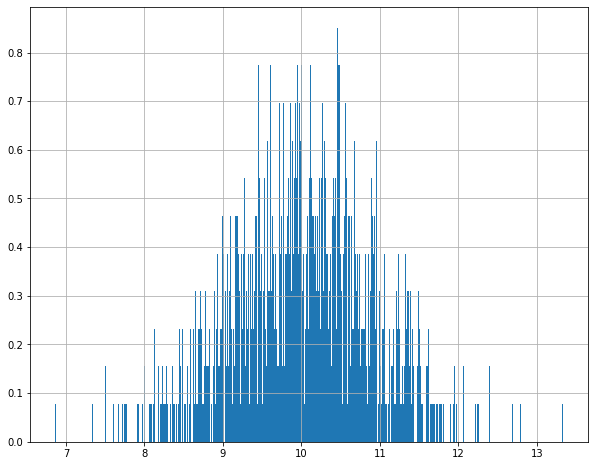

In [10]:
plt.figure(figsize=(10, 8))
collection['meanlist'].hist(bins=500, density=1)
plt.show()

It looks symmetric and like a normal distribution. 

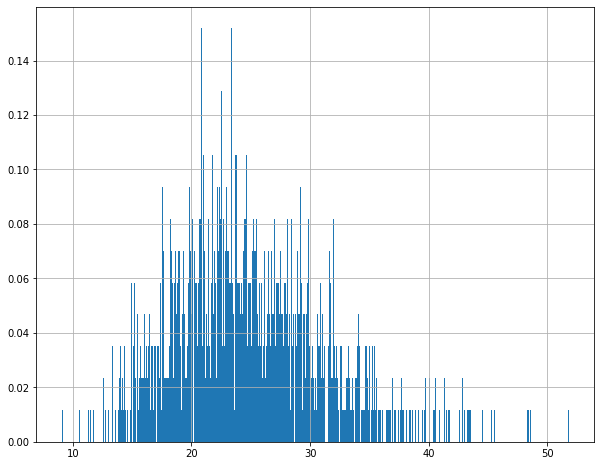

In [11]:
plt.figure(figsize=(10, 8))
collection['varlist'].hist(bins=500, density=1)
plt.show()

The histogram of sample variance is not normal as you can see it is right-skewed. We can guess, in fact, we can mathematically prove that the sample mean has a normal distribution. If population is normal with mean equal to *μ* and variance equal to $σ^{2}$ , then the sample mean is also normal, with mean equal to *μ* and variance equal to $σ^{2}$, divided by sample size *N*:<br/>
Population is normal: $$N(μ, σ^{2})$$ => Sample mean is also normal: $$N(μ, \frac{σ^{2}}{n})$$

Why variance of the sample mean is smaller than variance of a population? Intutionally, the sample mean is the average of *N* individuals of population, and hence the variation of sample mean is smaller than the variation of individuals in population. 

Here is a demonstration using Python: 

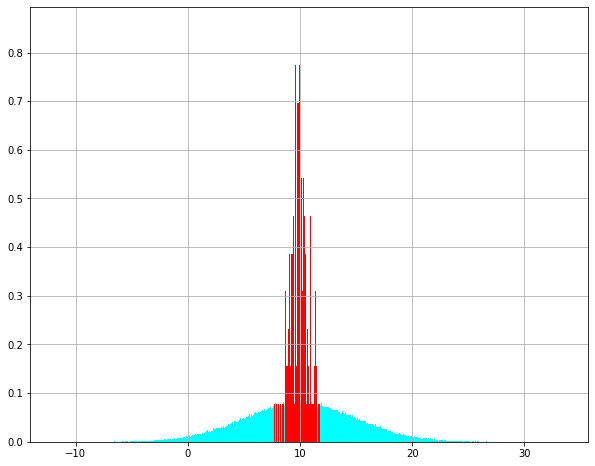

In [12]:
pop = pd.DataFrame(np.random.normal(10, 5, size=100000)) # approximate to population

plt.figure(figsize=(10, 8))
pop[0].hist(bins=500, color='cyan', density=1)
collection['meanlist'].hist(bins=500, density=1, color='red')
plt.show()

Then blue histogram is for population, the red one is for the sample mean. What if the population is not normal? Central limit theory of statistics say, if the sample size is large, the distribution of sample means looks like normal one:
### <center>Central Limit theorem</center>
**<center>if the sample size is large enough, the distribution of sample mean is approximately normal with:</center>** $$N(μ, \frac{σ^{2}}{n})$$

Hence, we can conclude this way, even if the population is not normal, the sample is approximately normal if the sample size is large enough.

Here's an example about distribution of sample mean when the population is not normal:

In [13]:
samplemeanlist = []
apop = pd.DataFrame([1, 0, 1, 0, 1])

for i in range(100000):
    sample = apop[0].sample(10, replace=True) # small sample size
    samplemeanlist.append(sample.mean())

acollec = pd.DataFrame()
acollec['meanlist'] = samplemeanlist

As you can see here, *apop* is a DataFrame name, which save the population. In this population, we only have five values: 1,0,1,0,1. We can generate 100,000 samples with small sample size 10. 

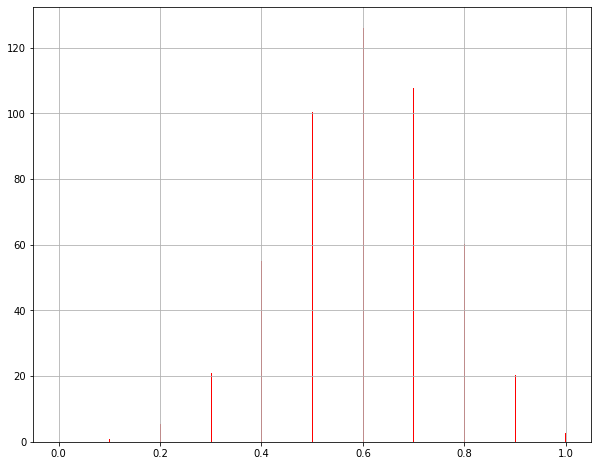

In [14]:
plt.figure(figsize=(10, 8))
acollec['meanlist'].hist(bins=500, color='red', density=1)
plt.show()

You can see that in this histogram it does not look like a normal distribution. 

But, if you generate 100,000 samples with large sample size 2,000:

In [15]:
samplemeanlist = []
apop = pd.DataFrame([1, 0, 1, 0, 1])

for i in range(100000):
    sample = apop[0].sample(2000, replace=True) # small sample size
    samplemeanlist.append(sample.mean())

acollec = pd.DataFrame()
acollec['meanlist'] = samplemeanlist

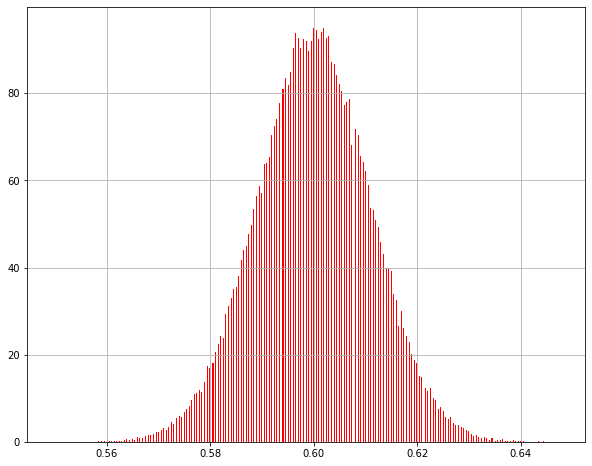

In [16]:
plt.figure(figsize=(10, 8))
acollec['meanlist'].hist(bins=500, color='red', density=1)
plt.show()

The distribution of samplemean now looks like a normal distribution. 

## <center>Confidence Interval</center>

In this part, we will explore how to estimate the average return using confidence interval. Here is a sample of the log return of a stock price of Apple: 

In [17]:
aapl = pd.read_csv('data/apple.csv', index_col='Date')
aapl['logReturn'] = np.log(aapl['Close'].shift(-1)) - np.log(aapl['Close'])
aapl.head()

,Open,High,Low,Close,Adj Close,Volume,logReturn
Date,,,,,,,
2006-10-02,10.728572,10.838572,10.614285,10.694285,7.239566,178159800,-0.010474
2006-10-03,10.635715,10.707143,10.455714,10.582857,7.164135,197677200,0.017396
2006-10-04,10.585714,10.780000,10.451428,10.768572,7.289855,207270700,-0.007323
2006-10-05,10.647142,10.880000,10.590000,10.690000,7.236666,170970800,-0.008185
2006-10-06,10.631429,10.720000,10.544286,10.602858,7.177672,116739700,0.005509


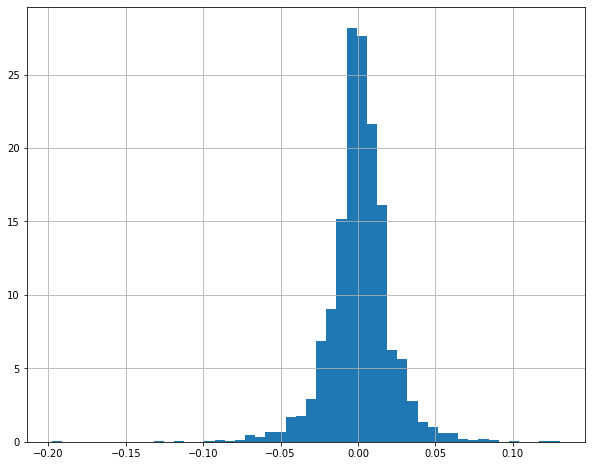

In [18]:
plt.figure(figsize=(10, 8))
aapl['logReturn'].hist(bins=50, density=1)
plt.show()

We can get average return in this sample. We can sample mean to estimate the real average return, which is population mean in our example. We want to do more about estimation. Intuitionally, if a sample is a good representative of the population, the population mean should be close to sample mean. It is plausible to say that the population mean is in a range with sample mean centered. 

Hence, our task is to estimate population mean using interval with lower and upper bound. 

To start with, we need to standardize sample mean because different sample has different mean and a standard deviation. We saw that distribution of sample mean is normal. We can standardize sample mean with the formula:<br/>
$$Z = \frac{\overline{x} - μ}{\frac {σ}{\sqrt{n}}}$$

<br/>
After standardization, it'll become standard normal, and follows *Z-distribution*. For **Z-distribution**, it is not difficult to find the two quantities; $Z_{\frac{α}{2}}$, and $Z_{1-\frac{α}{2}}$ such that in the middle, the probability is $1 - α$. Since Z is symmetric with respect to zero, the magnitudes of these two quantiles are the same except the sign: $Z_{1-\frac{α}{2}}$ = -$Z_{\frac{α}{2}}$. 

Since the standardization form of sample mean is also Z, then we have this equation:

**<center>Confidence Interval:</center>**
$$P(Z_{\frac{α}{2}} \leq \frac{\overline{x} - μ}{\frac {σ}{\sqrt{n}}} \leq Z_{1-\frac{α}{2}}) = 1-α$$

<br/>
With some calculation in the parenthesis, we can have this form:

$$P(\overline{X} - \frac{σ}{\sqrt{n}} Z_{\frac{α}{2}} \leq μ \leq \overline{X} + \frac{σ}{\sqrt{n}} Z_{1-\frac{α}{2}}) = 1-α$$


which explicitly gives the upper and lower bounds for population mean. Notice that *σ* is the population standard deviation, which is usually unknown. In practice, we can replace it using the sample standard deviation, *s*, if sample size is large enough. The interval here, for *μ* is called **confidence interval** at the level of *1 - α*. 

In our problems, to build the interval for the average return, we need to find quantiles of mean distribution. We can use the *norm.ppf* to get the quantiles:

In [19]:
# values for calculating the 80% confidence interval
z_left = norm.ppf(0.1)
z_right = norm.ppf(0.9)
sample_mean = aapl['logReturn'].mean()
sample_std = aapl['logReturn'].std(ddof=1) / (aapl.shape[0]) ** 0.5

Here, $\frac{α}{2} = 0.1$.Hence confidence level is 80%. Then we can calculate sample mean and the standard deviation of sample in which the population standard deviation is replaced by sample standard deviation. The 80% of confidence interval is printed out. 

In [20]:
interval_left = sample_mean + z_left * sample_std
interval_right = sample_mean + z_right * sample_std

print("Sample mean is: ", sample_mean)
print("**********************************")
print("80% confidence interval is: ")
print(interval_left, interval_right)

Sample mean is:  0.000975467759150088
**********************************
80% confidence interval is: 
0.0004927367254936755 0.0014581987928065005


Average return of Apple stocks falls in this interval with 80% chance. Notice, this interval is on the positive side. It implies that the average return is very likely to be positive.

## <center>Hypothesis Testing</center>

In many situations, we need to demonstrate validity of assertions. 

For example, you are a venture capitalist and is proposed a project running 36 months. With 36 months data at hand, should you invest in this project? Suppose you will invest if average monthly profit is over 20,000$. This question is not to ask you to estimate some parameters. Instead, you need to make a judgement whether the condition is satisfied. 

We need a new statistic tool, **hypothesis testing**.

This is a daily close price of Apple from 2007 to 2018: 

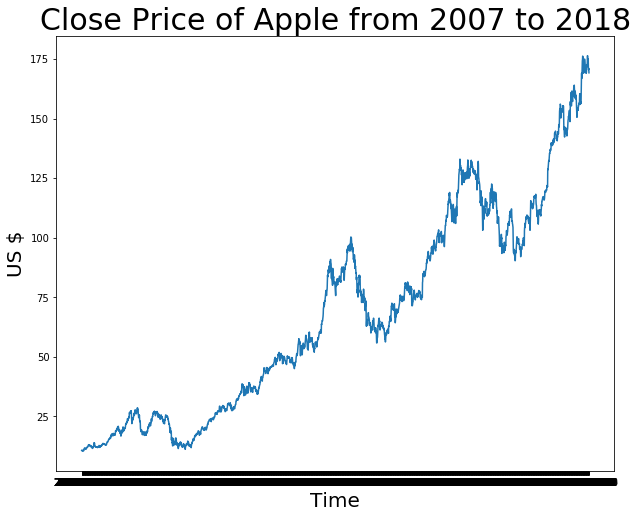

In [21]:
plt.figure(figsize=(10,8))
plt.title("Close Price of Apple from 2007 to 2018", size=30)
plt.xlabel("Time", size=20)
plt.ylabel("US $", size=20)
plt.plot(aapl.loc[:, 'Close'])
plt.show()

It looks like the price is in an upward trend and we may guess the average of daily return is positive. 

However, if we plot the daily return directly:

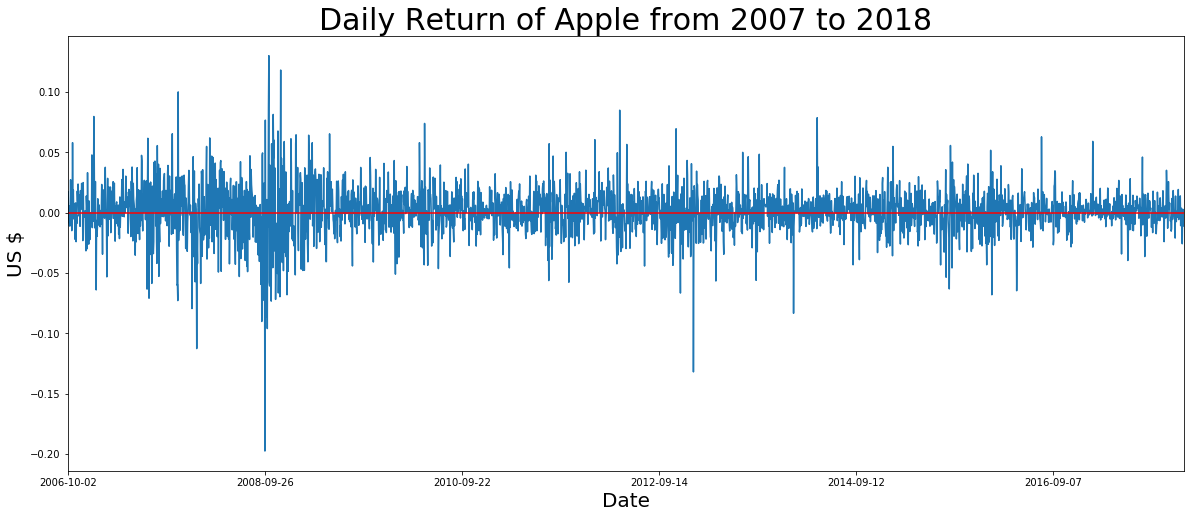

In [22]:
plt.title("Daily Return of Apple from 2007 to 2018", size=30)
plt.xlabel("Time", size=20)
plt.ylabel("US $", size=20)
# Log return goes up and down during the period
aapl['logReturn'].plot(figsize=(20, 8))
plt.axhline(0, color='red')
plt.show()


The daily return goes positive, negative. And our assertion that the average of daily return is positive is not obvious. It is also not obvious whether the average of daily return is 0 or not.

In the histogram daily return: 

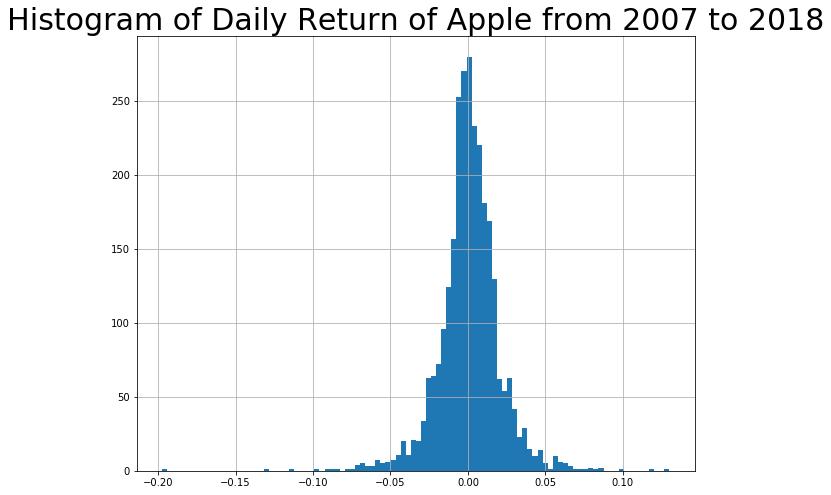

In [23]:
plt.figure(figsize=(10,8))
plt.title("Histogram of Daily Return of Apple from 2007 to 2018", size=30)
aapl.loc[:, 'logReturn'].hist(bins=100)
plt.show()

It is approximately symmetric above 0. It is still not obvious whether the average daily return is different from 0. We want to use a quantitative statistical tool to make judgement about the assertion that the average daily return is not 0.

We want to use a quantitative statistical tool to make judgement about the assertion that the average daily return is not 0. In statistics, hypothesis testing can use sample information to test the validity of conjectures about these parameters. 

Let's start with hypothesis testing. The first step is to set hypothesis. We have null hypothesis and alternative hypothesis: <br/><br/>
**Null hypotheris** $H_{0}:$ <br/>
**Alternative hypotheris** $H_{α}:$ <br/>

Usually, the null hypothesis is assertion we are against. Alternative hypothesis is a conclusion we accept whenever we reject the null.

Hence in our example, the null is population mean, the average daily return is 0. In alternative hypothesis, average daily return is not equal to 0:
<br/><br/>
**Null hypotheris** $H_{0}: μ=0$ <br/>
**Alternative hypotheris** $H_{α}: μ \neq 0$ 
<br/><br/>
Whether to reject or not reject null hypothesis is a sample based decision.

Intuitionally, given that the null is correct, the difference between sample statistic, $\overline{x}$, and the population parameter *μ* cannot be very large. If it's significantly large, the null should be incorrect, and we should accept alternative:
<br/><br/>
**<center>Given $H_{0}$ is correct:</center>**
<center>$\vert \overline{x} - μ \vert  $-------------> Not very large</center>
<br/><br/>

To measure the magnitude of difference, we also need to consider the standard deviation of the sample, because the sample with a large standard deviation usually its magnitude is larger, hence we need to do standardization. 

If we know population standard deviation, the standardized sample mean we denote as $\hat{z}$, and the z-distribution, if population is normal, or it's sample size large. 

If a $\hat{z}$ is far away from 0, then null is not likely to be true. 

In hypothesis testing, we start with assumption that the null is correct. 
Hence, we know population mean is equal to 0. But in most situations, population standard deviation, *σ*, is not known:

**<center>Z-distribution</center>**
$$Z = \frac{\overline{x} - μ}{\frac {σ}{\sqrt{n}}}$$


Then we can replace population standard deviation, *σ*, with the sample standard deviation, *s*. 
Then this new term denoted as $\hat{t}$, has a new distribution, t-distribution:

**<center>t-distribution</center>**
$$t = \frac{\overline{x} - μ}{\frac {s}{\sqrt{n}}}$$

Similar to z-distribution, *t* is a symmetric with respect to 0 and a bell-shaped. The difference lies in the tail. t-distribution had flat tails which implies t has a higher chance to take the values in the two tails. The t-distribution is a dependent on the **degree of freedom**. 

In our example, the degree of freedom is equal to the degree of freedom of the sample standard deviation, which is *n-1*. As the sample size increases, the degree of freedom increases, and the *t* is more and more like z-distribution. So with a large sample, we can treat *t* as if it is a z-distribution.

With large sample, $\hat{t}$ follows z-distribution hence we denote this statistic using  $\hat{z}$ too:

$$\hat{z} = \frac{\overline{x} - μ}{\frac {s}{\sqrt{n}}}$$

To emphasize that, it follows z-distribution. We can compute $\hat{z}$ using Python. $\overline{x}$ is sample mean, average daily return, *s* is sample standard deviation, *n* is a sample size. 

In [24]:
xbar = aapl['logReturn'].mean()
s = aapl['logReturn'].std(ddof=1)
n = aapl['logReturn'].shape[0]
zhat = (xbar-0)/(s/n**0.5)
print(zhat)

2.5896661841029576


We use *μ* equal to 0 because we assume the null is correct at the beginning.

If $\hat{z}$ is different from 0 significantly, we can infer that this sample is not sampled for the population with mean equal to 0. 
Then, we can reject the null. 

How do we find the significance level? 

We use the probability on the two tails of a z-distribution. With fixed the significance level, for example, α= 5%, which is the probability for *z* to take the values of some demands of the two tails. 

We can see that these two demands is $z < z_{0.025} = -1.96$ and z > z_{0.975} = -1.96. 
-1.96 and positive 1.96 are 2.5% and 97.5% quantiles of *z*. These two demands are called **rejection regions** and this kind of test is called **two-tailed test**. 

If statistic $\hat{z}$ falls into rejection region, we can tell that statistics is far away from 0, significantly and then we can reject the null:

#### <center> At α = 5%,</center>
#### <center> Reject $H_{0}$ if </center>
#### <center>$\hat{z} > 1.96$ or $\hat{z} < -1.96$</center>

Here, we should notice that $\hat{z}$ is also possible to take values in rejection region even if the null is correct, and the $μ=0$. This chance is equal to α = 5%. 

In other words, we have a 5% chance to reject null wrongly. This is called a **type 1 error**, and the probability of a type 1 error is identical to the level of significance level. If a significance level is small, the probability of a type 1 error is smaller. 


Here, we demonstrate how to get the quantiles which is also called **critical values**. α = 5% is a given hence, *norm.ppf* can be applied to get the quantiles:

In [27]:
# Set Decision Criteria
alpha = 0.05 # α = 5%
z_left = norm.ppf(alpha/2, 0, 1)
z_right = -z_left
print(z_left, z_right)
print("At the significance level of ", alpha)
print("Shall we reject?: ", zhat>z_right or zhat<z_left)

-1.9599639845400545 1.9599639845400545
At the significance level of  0.05
Shall we reject?:  True


In the print, we use a bold number to generate whether to reject or not directly. Hence, our final conclusion, we will reject null hypothesis and the average daily return is not equal to 0. Our conclusion may be wrong but it happens only with 5% probability. We may want to further demonstrate that the average return is in fact positive. We need another kind of test, **one-tail test**.

In one tail test, the null is the average daily return is less than or equal to 0, which we are against. The alternative hypothesis, the average daily return is positive:

### <center> Hypothesis for One Tail Test</center>
#### <center> Null Hypothesis    $H_{0}: μ \leq 0$  </center>
#### <center> Alternative Hypothesis    $H_{α}: μ > 0$  </center>


First, we take a $μ = 0$. We still need to standardize sample mean, which is average daily return in the sample.

If $\hat{z}$ is significantly large, which implies that sample mean is a positive comparing to $μ = 0$. 
Hence, it is not likely to be sampled from population, which may equal to 0. It is also not likely to be sampled from population with negative *μ*.

Similarly, we fix significance level *a*, and identify rejection region using z-distribution, which is $\hat{z}$ is larger than $z_{α}$:

#### <center> Reject $H_{0}$ if </center>
#### <center>$\hat{z} > z_{α} $</center>

Using Python, we can show that the null is rejected under 5%. It means that the average daily return of a population is indeed positive. 

In [28]:
# Set Decision Criteria
alpha = 0.05 # α = 5%
z_right_new = norm.ppf(1 - alpha, 0, 1)
print(z_right_new)
print("At the significance level of ", alpha)
print("Shall we reject?: ", zhat>z_right_new)

1.6448536269514722
At the significance level of  0.05
Shall we reject?:  True


From this result, we do need a quantitative statistic tool to validate our assertion in addition to visualize the data. 

Conclusion, for population mean, we have these three kinds of hypothesis in the regression criteria.

For different kinds of hypothesis, the criterion is different.

A more popular way of testing is to compute **p-value**. We know that given that null is correct, standardized sample mean follows z-distribution. What is the probability for this distribution to take a more extreme value than our observation in given sample? This is a *p-value*, if $p < α$ which is a threshold, it means that the null is unlikely to be true.

With p-value, we only need to compare it with *α* although the way to compute *p* is different. 

Here's a demonstration of p-value approach, in two-tailed test, *abs* is to compute the absolute value. We use *norm.cdf* to compute cumulative probability:

In [30]:
alpha = 0.05
p = 1 - norm.cdf(abs(zhat), 0, 1)
print("At the significance level of ", alpha)
print("Shall we reject?: ", p < alpha)

At the significance level of  0.05
Shall we reject?:  True
